### Curso de Python para Finanças Quantitativas
#### Autor: Leandro Guerra - Outspoken Market
#### Download em: https://www.outspokenmarket.com/pythonfinancasquantitativas.html

In [1]:
# Carregando as bibliotecas necessarias

from pandas_datareader import data as pdr
from datetime import date
import yfinance as yf
yf.pdr_override()
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Configuraçoes iniciais

ticker = "^BVSP"
inicio = "2015-01-01"
fim = "2023-08-21"

In [4]:
# Coleta dos dados

df = pdr.get_data_yahoo(ticker, start = inicio, end = fim)

[*********************100%%**********************]  1 of 1 completed


In [7]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,50005.0,50005.0,48345.0,48512.0,48512.0,2882100
2015-01-05,48512.0,48512.0,47264.0,47517.0,47517.0,3866100
2015-01-06,47517.0,48061.0,47338.0,48001.0,48001.0,4559300
2015-01-07,48006.0,49882.0,48006.0,49463.0,49463.0,4408800
2015-01-08,49463.0,50261.0,49017.0,49943.0,49943.0,3621900


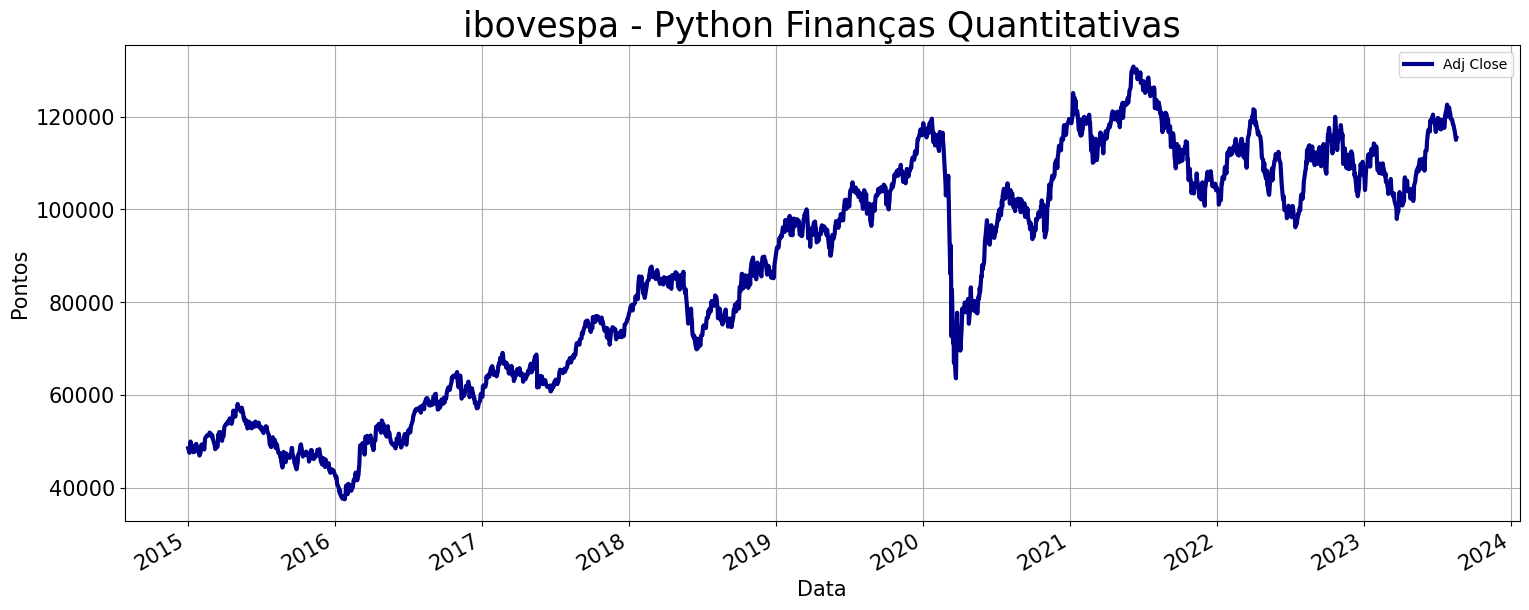

In [11]:
# Primeiro grafico

df["Adj Close"].plot(grid = True, figsize = (18, 7), linewidth = 3, fontsize = 15, color = "darkblue")
plt.xlabel("Data"
           , fontsize = 15);
plt.ylabel("Pontos"
           , fontsize = 15);
plt.title("ibovespa - Python Finanças Quantitativas"
           , fontsize = 25);
plt.legend();

In [12]:
# Calculando as bandas de bollinger

# Parametros iniciais
periodo = 50
desvios = 2

df["desvio"] = df["Adj Close"].rolling(periodo).std()
df["MM"] = df["Adj Close"].rolling(periodo).mean()
df["Banda_Sup"] = df["MM"] + (df["desvio"]*desvios)
df["Banda_Inf"] = df["MM"] - (df["desvio"]*desvios)

In [13]:
# Filtrando os valores missing

df = df.dropna(axis = 0) 

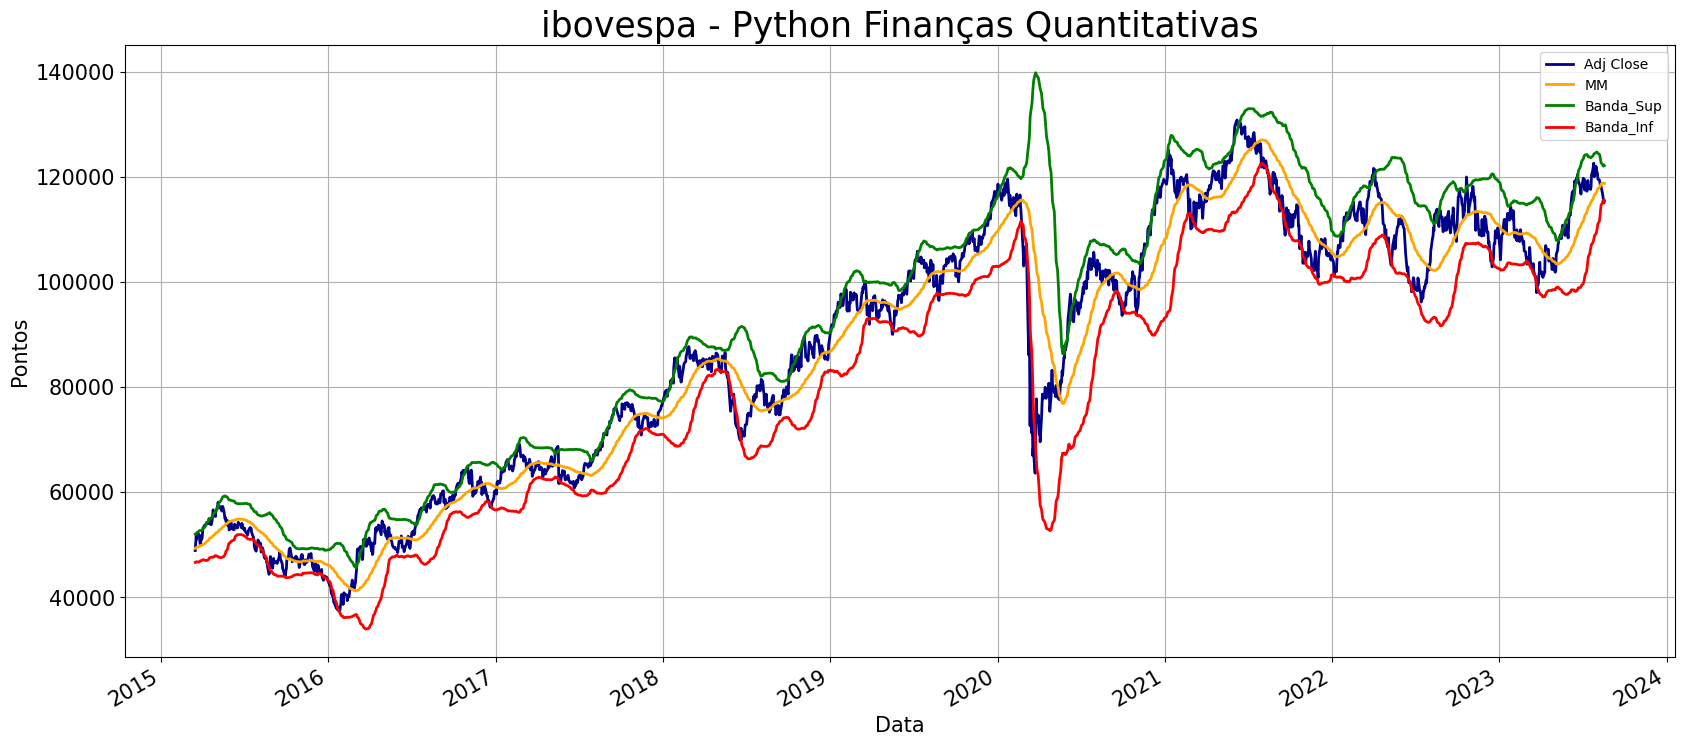

In [17]:
# Inserindo tudo no grafico


df[["Adj Close", "MM", "Banda_Sup", "Banda_Inf"]].plot(grid = True
                                                        , figsize = (20, 9)
                                                        , linewidth = 2
                                                        , fontsize = 15
                                                        , color = ["darkblue", "orange", "green", "red"])
plt.xlabel("Data"
           , fontsize = 15);
plt.ylabel("Pontos"
           , fontsize = 15);
plt.title("ibovespa - Python Finanças Quantitativas"
           , fontsize = 25)
plt.legend();

In [18]:
# Construcao dos alvos

periodos = 5

# Alvo - Retorno
df.loc[:, "Retorno"] = df["Adj Close"].pct_change(periodos)
df.loc[:, "Alvo"] = df["Retorno"].shift(-periodos)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_1476\1038710854.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, "Retorno"] = df["Adj Close"].pct_change(periodos)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_1476\1038710854.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, "Alvo"] = df["Retorno"].shift(-periodos)


In [19]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,desvio,MM,Banda_Sup,Banda_Inf,Retorno,Alvo
Date,,,,,,,,,,,,
2015-03-16,48602.0,49205.0,48394.0,48848.0,48848.0,3155400,1342.718632,49279.32,51964.757264,46593.882736,NaN,0.062643
2015-03-17,48849.0,50384.0,48841.0,50285.0,50285.0,4013900,1345.449736,49314.78,52005.679471,46623.880529,NaN,0.024282
2015-03-18,50284.0,51773.0,49788.0,51526.0,51526.0,4458900,1355.544577,49394.96,52106.049154,46683.870846,NaN,0.006443
2015-03-19,51530.0,51547.0,50791.0,50954.0,50954.0,3263600,1357.899270,49454.02,52169.818541,46738.221459,NaN,-0.007340
2015-03-20,50964.0,52286.0,50964.0,51967.0,51967.0,4916800,1403.641172,49504.10,52311.382345,46696.817655,NaN,-0.036023


In [20]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,desvio,MM,Banda_Sup,Banda_Inf,Retorno,Alvo
Date,,,,,,,,,,,,
2023-08-14,118067.0,118082.0,116530.0,116810.0,116810.0,11203500,1831.611279,118686.80,122350.022558,115023.577442,-0.021528,NaN
2023-08-15,116809.0,117697.0,116033.0,116171.0,116171.0,14636000,1657.285994,118756.30,122070.871989,115441.728011,-0.024511,NaN
2023-08-16,116171.0,117338.0,115534.0,115592.0,115592.0,18862600,1612.356311,118775.94,122000.652622,115551.227378,-0.023790,NaN
2023-08-17,115592.0,116610.0,114859.0,114982.0,114982.0,12747500,1634.845442,118765.82,122035.510884,115496.129116,-0.028458,NaN
2023-08-18,114973.0,115729.0,114423.0,115409.0,115409.0,10601000,1685.037877,118733.62,122103.695755,115363.544245,-0.022496,NaN


In [21]:
# Filtrando os valores missing

df = df.dropna(axis = 0) 

In [22]:
# Criando a regra de trade

df.loc[:, "Regra"] = np.where(df.loc[:, "Adj Close"] > df.loc[:, "Banda_Sup"], 1, 0)
df.loc[:, "Regra"] = np.where(df.loc[:, "Adj Close"] < df.loc[:, "Banda_Inf"], -1, df.loc[: , "Regra"])

In [23]:
# Aplicando a regra no alvo

df.loc[:, "Trade"] = df.loc[:, "Regra"]*df.loc[:, "Alvo"]

In [24]:
# Calculando o resultado acumulado em juros simples

df.loc[:, "Retorno_Trade_BB"] = df["Trade"].cumsum()

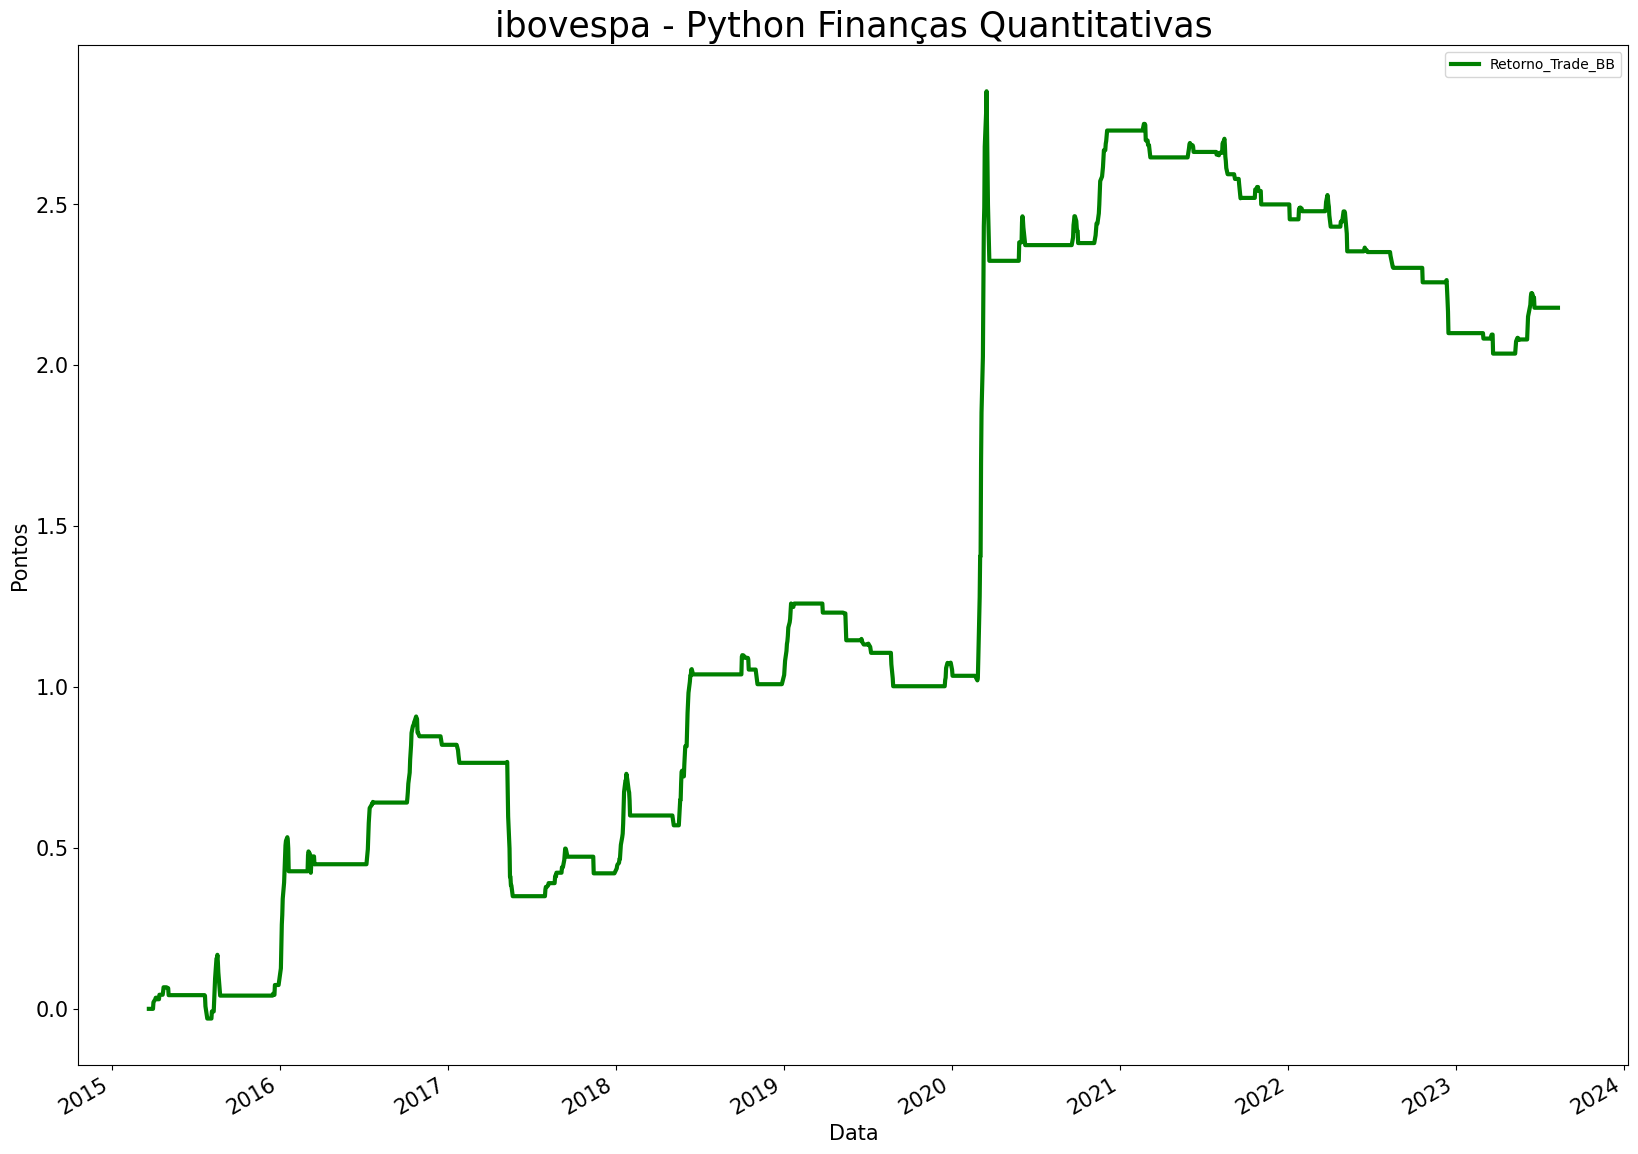

In [25]:
df["Retorno_Trade_BB"].plot(figsize=(20, 15), linewidth = 3, fontsize = 15, color = "green")
plt.xlabel("Data"
           , fontsize = 15);
plt.ylabel("Pontos"
           , fontsize = 15);
plt.title("ibovespa - Python Finanças Quantitativas"
           , fontsize = 25)
plt.legend();

In [17]:
# Testes adicionais:
# O que acontece quando fazendo com 21 dias e alvos em 5 e 10 periodos?
# E quando fazemos para um periodo de 50 dias e alvo em 10 periodos?